In [1]:
import pandas as pd

AAPL = '/kaggle/input/apple-inc-historical-stock/apple_stock.csv'
df = pd.read_csv(filepath_or_buffer=AAPL)
df['date'] = pd.to_datetime(df['Date'].apply(func=lambda x: str(x).split(' ')[0]))
df['year'] = df['date'].dt.year
df.head()

,Date,Adj Close,Close,High,Low,Open,Volume,date,year
0,2023-11-02 00:00:00+00:00,176.665985,177.570007,177.779999,175.460007,175.520004,77334800,2023-11-02,2023
1,2023-11-03 00:00:00+00:00,175.750671,176.649994,176.820007,173.350006,174.240005,79763700,2023-11-03,2023
2,2023-11-06 00:00:00+00:00,178.317520,179.229996,179.429993,176.210007,176.380005,63841300,2023-11-06,2023
3,2023-11-07 00:00:00+00:00,180.894333,181.820007,182.440002,178.970001,179.179993,70530000,2023-11-07,2023
4,2023-11-08 00:00:00+00:00,181.958893,182.889999,183.449997,181.589996,182.350006,49340300,2023-11-08,2023


We've done some feature engineering; let's look at our price/volume correlations.

In [2]:
df[['Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume',]].corr()

,Adj Close,Close,High,Low,Open,Volume
Adj Close,1.000000,0.999958,0.997834,0.997151,0.994280,-0.105114
Close,0.999958,1.000000,0.997783,0.997170,0.994248,-0.105376
High,0.997834,0.997783,1.000000,0.996285,0.996162,-0.080047
Low,0.997151,0.997170,0.996285,1.000000,0.997739,-0.124372
Open,0.994280,0.994248,0.996162,0.997739,1.000000,-0.115153
Volume,-0.105114,-0.105376,-0.080047,-0.124372,-0.115153,1.000000


What do we see? We see that none of our data is redundant, and our prices and volume are slightly negatively correlated.

Let's look at our price time series first.

<Axes: xlabel='date', ylabel='Adj Close'>

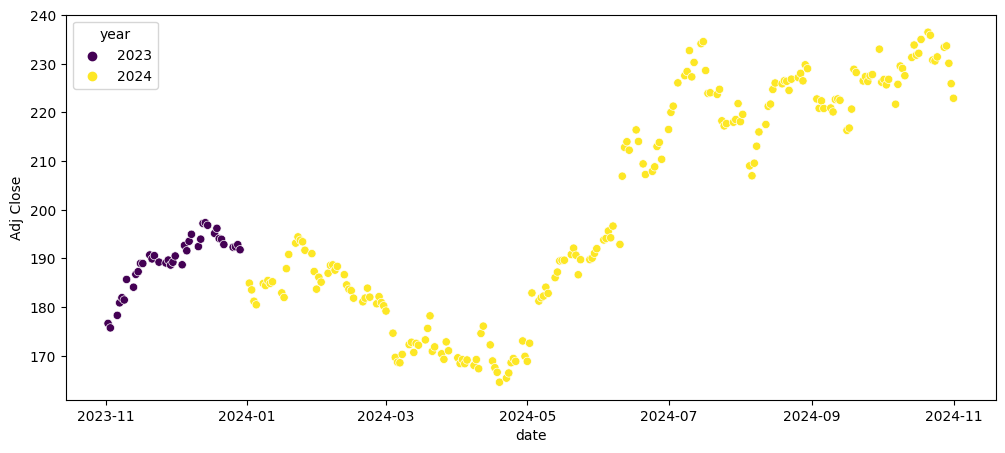

In [3]:
import matplotlib.pyplot as plt
from seaborn import scatterplot

FIGSIZE=(12, 5)
plt.figure(figsize=FIGSIZE)
scatterplot(data=df, x='date', y='Adj Close', hue='year', palette='viridis')

We only have data from two calendar years. We don't see much here: prices rise and decline in the first half of the period of interest, then rise pretty consistently thereafter. Let's look at the price/volume relationship over time.

<Axes: xlabel='Adj Close', ylabel='Volume'>

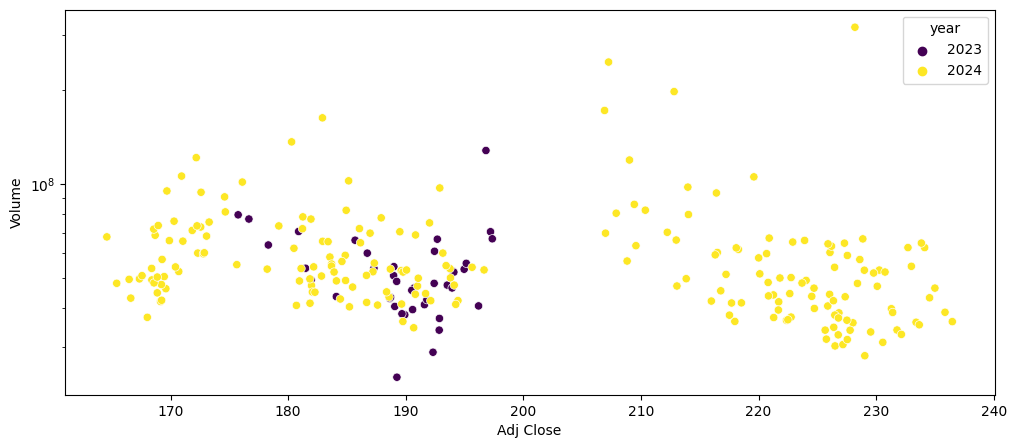

In [4]:
plt.figure(figsize=FIGSIZE)
plt.yscale(value='log')
scatterplot(data=df, x='Adj Close', y='Volume', hue='year', palette='viridis')

Because we have some outliers, plotting the log of the volume against the prices gives us a nicer-looking plot. The daily volume mostly stays in a range south of 1e8, and we see how prices jumped above $200 suddenly and never retrenched.